
----------------------------------------------------------------------------------------

# How Brazil was affected by Hosting the 2016 Summer Olympics

----------------------------------------------------------------------------------------


### How hosting the Olympics impacted Brazil international trade

#### Assumption
have positive impact on trade for Brazil

* While bidding for hosting the Olympics, it is implied that country reduces restrictions on the international exchange of goods.
* We are assuming that such strategy should have considerable positive impact on Brazil trade.
----------------------------------------------------------------------------------------


### Data Source
<table style="margin-left:10px;">
    <tr>
        <td><img src = "https://wits.worldbank.org/images/partners/logounctad.jpg"/></td>
        <td><img src = "https://wits.worldbank.org/images/partners/logowb.jpg"/></td>
        <td><img src = "https://wits.worldbank.org/images/partners/logowto.jpg"></td>
    </tr>
</table>

* World Integrated Trade Solution (WITS) API was used to get Trade Data.
* It partnerships with
 - UNCTAD (United Nations Conference on Trade and Development);
 - World Bank;
 - WTO OMC.
* Python package to work with WITS API was used
 - https://pypi.org/project/world-trade-data/
 - pip install world_trade_data

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import world_trade_data as wits

### Get the Data
- Get Total Values of Export and Import Trade for Brazil for selected years
- Store Data to Pandas Data Frame

In [33]:
# Specify years of interest
years = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# Save significant years to variables
win_bid_year = 2009
host_year = 2016

# Create List to store annual trade values
bra_imports = []
bra_exports = []

for year in years:
    
    # Request the values for the corresponding import and exports.
    # Use the default value for partner='wld', and the default value for product='all'.
    curr_imp = wits.get_indicator('MPRT-TRD-VL', reporter='bra', year=f'{year}')
    curr_exp = wits.get_indicator('XPRT-TRD-VL', reporter='bra', year=f'{year}')
    
    # Remove the first levels of the index
    curr_imp = curr_imp.loc['Annual'].loc['Brazil'].loc['World']
    curr_exp = curr_exp.loc['Annual'].loc['Brazil'].loc['World']
    
    # Rebind Multi level df.index to the ProductCode
    curr_imp.index = curr_imp.index.get_level_values(0)
    curr_exp.index = curr_exp.index.get_level_values(0)
    
    # Get Values for total import/export for the year    
    imp = curr_imp.loc["All Products"]['Value']
    exp = curr_exp.loc["All Products"]['Value']
    
    bra_imports.append(imp)
    bra_exports.append(exp)
    
bra_imports

[47242654.093,
 48325649.661,
 62835613.536,
 73600375.464,
 91342783.548,
 120617439.7,
 172984767.614,
 127722340.412,
 181768424.09,
 226246755.801,
 223183474.672,
 239747515.987,
 229154460.893,
 171446211.662,
 137552002.466,
 150749493.921,
 181230498.358,
 177347934.749]

In [34]:
# Save trade data to Data Frame
trade_df = pd.DataFrame({
    "Import": bra_imports,
    "Export": bra_exports
}, index = years)
trade_df

,Import,Export
2002,4.724265e+07,6.043865e+07
2003,4.832565e+07,7.320322e+07
2004,6.283561e+07,9.667725e+07
2005,7.360038e+07,1.185287e+08
2006,9.134278e+07,1.378062e+08
2007,1.206174e+08,1.606489e+08
2008,1.729848e+08,1.979424e+08
2009,1.277223e+08,1.529947e+08
2010,1.817684e+08,2.019151e+08
2011,2.262468e+08,2.560387e+08


### Visualization
* Plot Chart to show Brazil Trend tendency over years

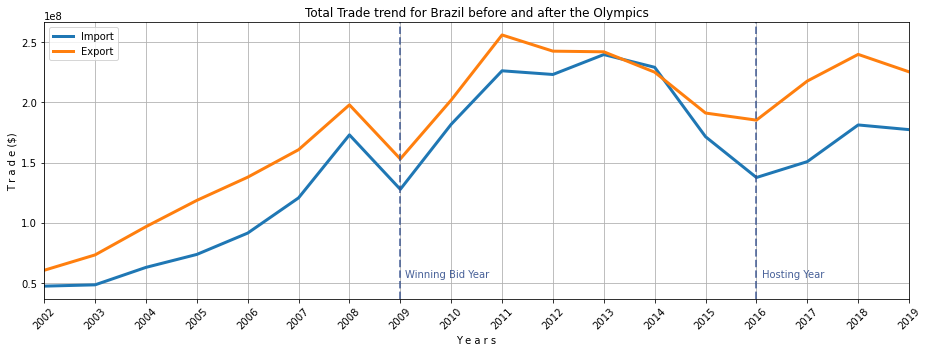

In [35]:
fig,ax = plt.subplots()

# Build Line Chart for trade_df
trade_plot = trade_df.plot(kind = "line", figsize=(13,5), lw = 3, grid = True, ax=ax)

trade_plot.set_xticks(years)
trade_plot.set_xticklabels(years, rotation=45)

# Display bid winning and hosting years
year_of_interest = [win_bid_year,host_year]

for year in year_of_interest:
    ax.axvline(year, color='#334f8d', alpha = 0.7, linestyle="--", lw=2)

# Define function to add labels on graph
def addlabels(axes,x,y,text):
    axes.text(x=x, y=y, s=text, alpha=0.9, color='#334f8d')  
    
addlabels(ax, year_of_interest[0]+0.1, 0.55*1e8, "Winning Bid Year")
addlabels(ax, year_of_interest[1]+0.1, 0.55*1e8, "Hosting Year")

trade_plot.set_ylabel("T r a d e ($)")
trade_plot.set_xlabel("Y e a r s")

plt.xlim(2002, 2019)
plt.title("Total Trade trend for Brazil before and after the Olympics")
plt.tight_layout()

fig.savefig(f"Output/BRA_Trend_trade.png")

### Investigate Trade Growth
* Find average Trade for periods:
 - before winning the bid to host Olympics,
 - after winning the bid,
 - after hosting the Olympics.
* Calculate the average increase in Trade

In [36]:
# Calculate mean trade for years preceeding Olympics
trade_beforeBid = trade_df.loc[trade_df.index<win_bid_year].mean()
trade_beforeBid

Import    8.813561e+07
Export    1.207493e+08
dtype: float64

In [37]:
# Calculate mean for years after bid
trade_afterBid = trade_df.loc[(trade_df.index>=win_bid_year)&(trade_df.index<host_year)].mean()
trade_afterBid

Import    1.998956e+08
Export    2.159693e+08
dtype: float64

In [38]:
# Calculate the average increase of trade in percentage after year winning the bid

# Define function to calculate increase
def getIncrease(df2,df1,value):
    subtract = df2[value]-df1[value]
    percent_increase = round(subtract/df1[value]*100,3)
    return percent_increase

# Export Increase
export_increase_bid = getIncrease(trade_afterBid, trade_beforeBid, "Export")
export_increase_bid

# Import Increase
import_increase_bid = getIncrease(trade_afterBid, trade_beforeBid, "Import")
import_increase_bid

126.805

In [39]:
# Calculate mean for years after Olympics
trade_afterHost = trade_df.loc[trade_df.index>=host_year].mean()
trade_afterHost

Import    1.617200e+08
Export    2.170615e+08
dtype: float64

In [40]:
# Calculate the average increase of trade in percentage after hosting
# Export Increase
export_increase_host = getIncrease(trade_afterHost, trade_beforeBid, "Export")
export_increase_host

# Import Increase
import_increase_host = getIncrease(trade_afterHost, trade_beforeBid, "Import")
import_increase_host

83.49

### Bar and Line Chart
* Plot average Trade for specified periods
* Show the average Trade growth

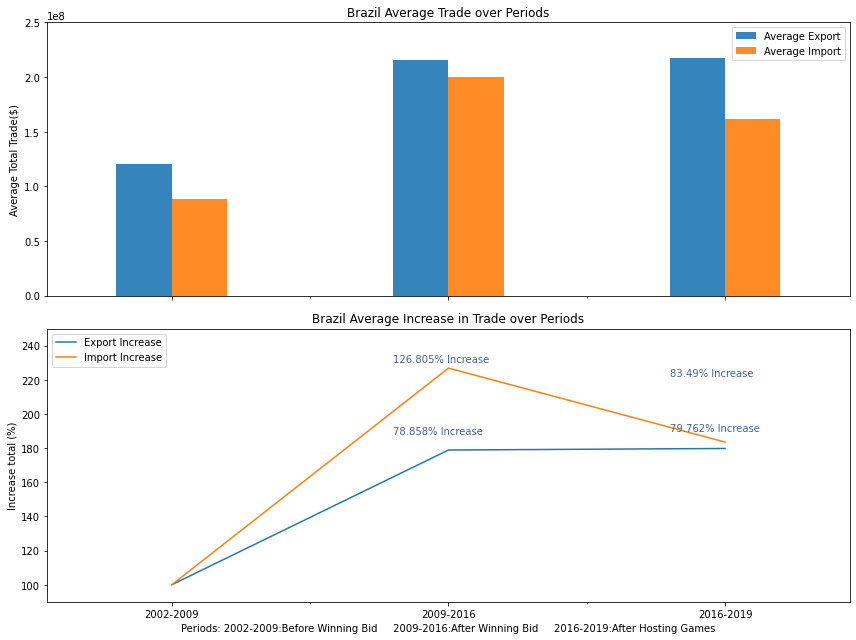

In [41]:
# Create DataFrame to plot Bar Chart 
y_valuesExp = [trade_beforeBid["Export"],
              trade_afterBid["Export"], trade_afterHost["Export"]]

y_valuesImp = [trade_beforeBid["Import"],
              trade_afterBid["Import"], trade_afterHost["Import"]]

x_values = ["2002-2009", "2009-2016", "2016-2019"]

aver_trade_df = pd.DataFrame({
    "Average Export": y_valuesExp,
    "Average Import": y_valuesImp,
}, index = x_values)


# Create DataFrame to plot Line Chart
y_valExpIncr = [100, 100+export_increase_bid, 100+export_increase_host]
y_valImpIncr = [100, 100+import_increase_bid, 100+import_increase_host]
y_valExpIncr

incr_trade_df = pd.DataFrame({
    "Export Increase": y_valExpIncr,
    "Import Increase": y_valImpIncr,
}, index = x_values)

# Plot both - Bar chart with average trade and Line chart with increase percentage of Trend
figure, axes = plt.subplots(nrows=2, sharex=True, sharey=False)

#Plot Bar Chart 
aver_trade_df.plot(kind = "bar", figsize=(12,9), width = 0.4, alpha = 0.9, ax=axes[0])
axes[0].set_ylabel("Average Total Trade($)")
axes[0].set_ylim(0, 2.5*1e8)
axes[0].set_title("Brazil Average Trade over Periods")

# Plot Line Chart
incr_trade_df.plot(ax=axes[1])

# Add Line Values
addlabels(axes[1],0.8,230,f"{import_increase_bid}% Increase")
addlabels(axes[1],1.8,222,f"{import_increase_host}% Increase")
addlabels(axes[1],0.8,188,f"{export_increase_bid}% Increase")
addlabels(axes[1],1.8,190,f"{export_increase_host}% Increase")

axes[1].set_ylabel("Increase total (%)")
axes[1].set_title("Brazil Average Increase in Trade over Periods")
axes[1].set_ylim(90, 250)

# Define plot parameters
plt.xticks(rotation="horizontal", horizontalalignment="center")
plt.xlabel(f"Periods: {x_values[0]}:Before Winning Bid     "
           f"{x_values[1]}:After Winning Bid     {x_values[2]}:After Hosting Games")
plt.legend(loc="upper left")

plt.tight_layout()

figure.savefig(f"Output/BRA_aver_trade_over_periods.png")

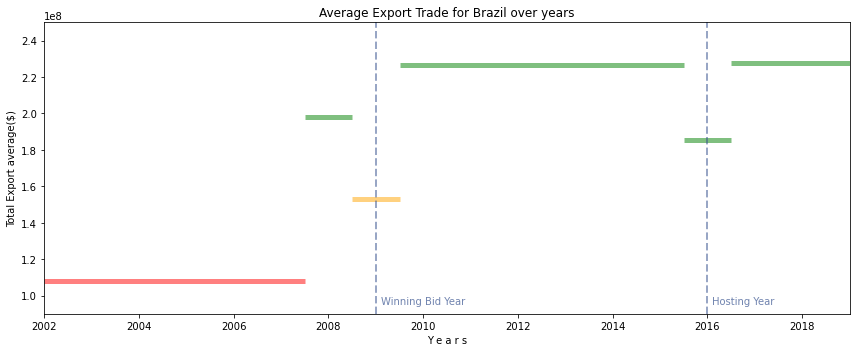

In [42]:
# Draw plot to show trade mean over time, include separate years

# Calculate mean for years till one year preceeding the year of winning the bid (2009-1 = 2008)
trade_before_bid_minus_one = trade_df.loc[trade_df.index<2008].mean()
trade_before_bid_minus_one

# Calculate mean for years after bid, edge values are not included
trade_bid_host = trade_df.loc[(trade_df.index>win_bid_year)&(trade_df.index<host_year)].mean()
trade_bid_host

# Calculate mean for years after host
trade_greaterHost = trade_df.loc[trade_df.index>host_year].mean()
trade_greaterHost

# Select Values for Trade Export as it is more significant in estimating the Trade
y_valuesExp = [trade_before_bid_minus_one["Export"], trade_df.loc[2008,'Export'], trade_df.loc[2009,'Export'],
              trade_bid_host["Export"], trade_df.loc[2016,'Export'], trade_greaterHost["Export"]]

x_valuesExp_max = [2007.5, 2008.5, 2009.5, 2015.5, 2016.5, 2019]
x_valuesExp_min = [2002, 2007.5, 2008.5, 2009.5, 2015.5, 2016.5]

fig1, ax = plt.subplots()
fig1.set_size_inches(12, 5)

# Horizontal lines
ax.hlines(y_valuesExp, x_valuesExp_min, x_valuesExp_max, linestyles = "solid", lw=5,
          alpha = 0.5, edgecolors=["red", "green", "orange", "green", "green", "green"])

# Vertical lines
for year in year_of_interest:
    ax.axvline(year, color='#334f8d', alpha = 0.5, linestyle="--", lw=2)
    
ax.text(x=2009.1, y=0.95*1e8, s="Winning Bid Year", alpha=0.7, color='#334f8d')
ax.text(x=2016.1, y=0.95*1e8, s="Hosting Year", alpha=0.7, color='#334f8d')

ax.set_title('Average Export Trade for Brazil over years')
ax.set_xlabel("Y e a r s")
ax.set_ylabel("Total Export average($)")

plt.xlim(2002, 2019)
plt.ylim(0.9*1e8, 2.5*1e8)

plt.tight_layout()
plt.show()

fig1.savefig(f"Output/BRA_export_sep_years.png")

### Analysis
* The Data for Total Trend for Brazil over time period that includes years preceeding the Olympics and available WITS data for years after Olympics was obtained and investigated.
* Line Chart for Export and Import trend tendency over time shows positive Trade Growth after year winning the bid to host Olympics - 2009.
* Average Trade values were calculated to estimate the average increase in Trade:
 - In the period 2009-2016 Import increased by 126.8%, Export by 78.9% in comparison to 2002-2009.
 - In the period 2016-2019 Trade levels stays at the obtained high increased values: Import increased by 83.5%, Export by 79.8% comparing to the average Trade values before 2009.
* Chart with average Trade over time including separate years shows in more details how hosting Olympics affects trade. 
 - The year before winning the bid 2008 it jumps up, winning the bid year 2009 - goes down.
 - Significant permanent trade increase comparing to trade level before 2008 is seen after winning the bid.
 - Goes a little down at the year of hosting 2016 and stays at the obtained high level after hosting the Olympics.
 
#### Conclusion
* From the available data we can conclude that our assumption was not incorrect, and Brazil experienced permanent Trade Growth after hosting the Olympics.
* To be more precise, Trade Growth starts from the time when Brazil was on the verge of winning the bid to host the Olympics - year 2008. This finding also do not contradict our assumption that country preparing to bid the hosting of Olympics takes a course towards trade liberalization policy, thus becomes more open to the international exchange of goods.
* It is not obvious from our analysis though what would happen to Trade tendency without actual hosting the Olympics. It might be that just bidding to host Olympics is enough for country to experience significant and permanent growth in Trade.